## Предел и производная

In [92]:
import sympy as sp
sp.init_printing()
%config InlineBackend.figure_format = 'retina'

### Пределы

Вычисление пределов. Для аналитического вычисления пределов используется функция limit(...).

In [93]:
import warnings
warnings.filterwarnings('ignore')

In [94]:
x,y,z = sp.symbols('x y z')

In [95]:
f_0 = 1 / x; f_0

In [96]:
sp.limit(f_0, x, sp.oo)

In [97]:
## Используем встроенные константы: E и pi
fx = (sp.E ** - x) * sp.cos(2 * sp.pi * x); fx

In [98]:
sp.limit(fx, x, sp.oo)

## Первый замечательный предел

In [99]:
f1_x = sp.sin(x) / x; f1_x

In [100]:
sp.limit(f1_x, x, 0)

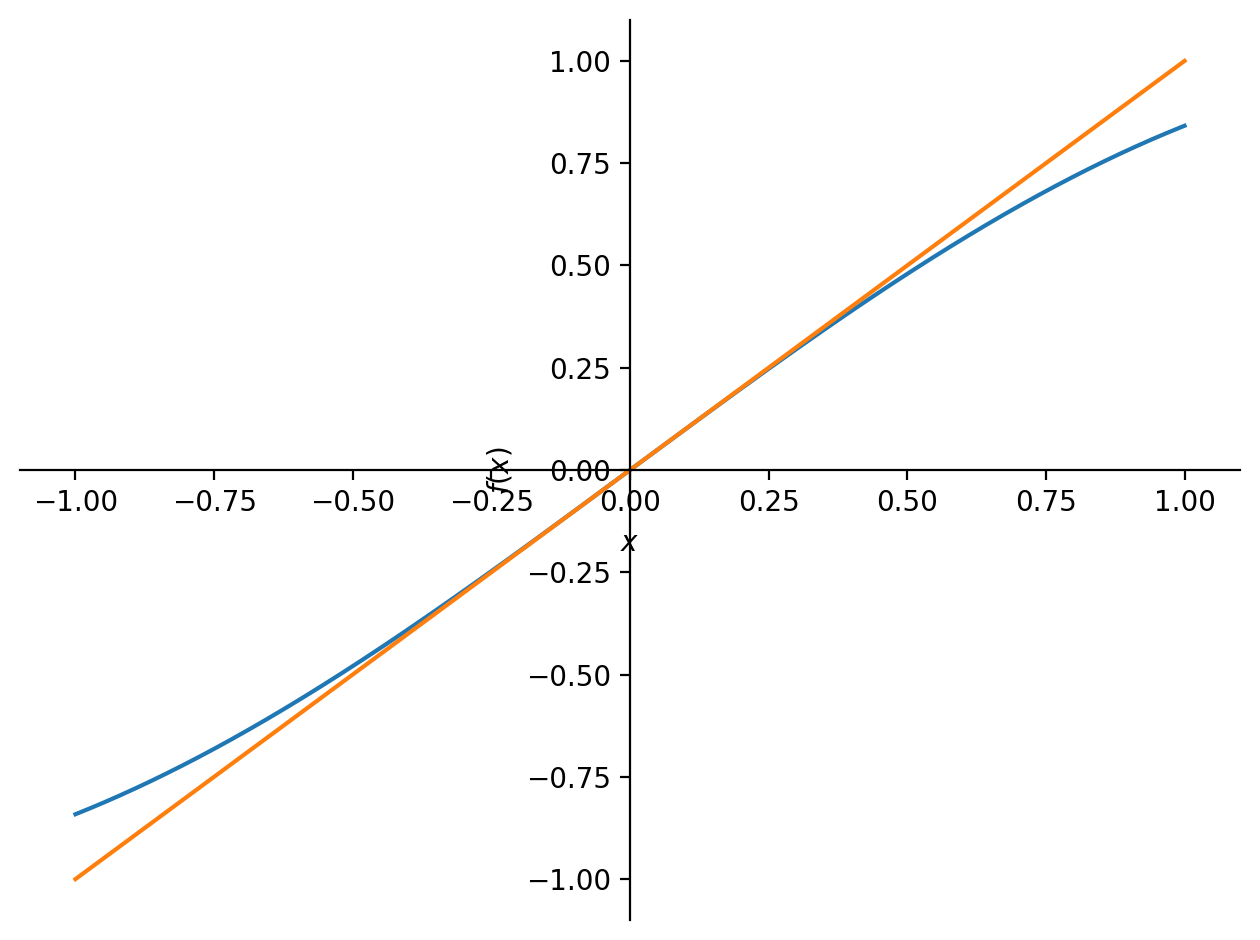

In [101]:
sp.plot(sp.sin(x), x, (x, -1, 1))

In [102]:
f2_x = x * sp.log(x); f2_x

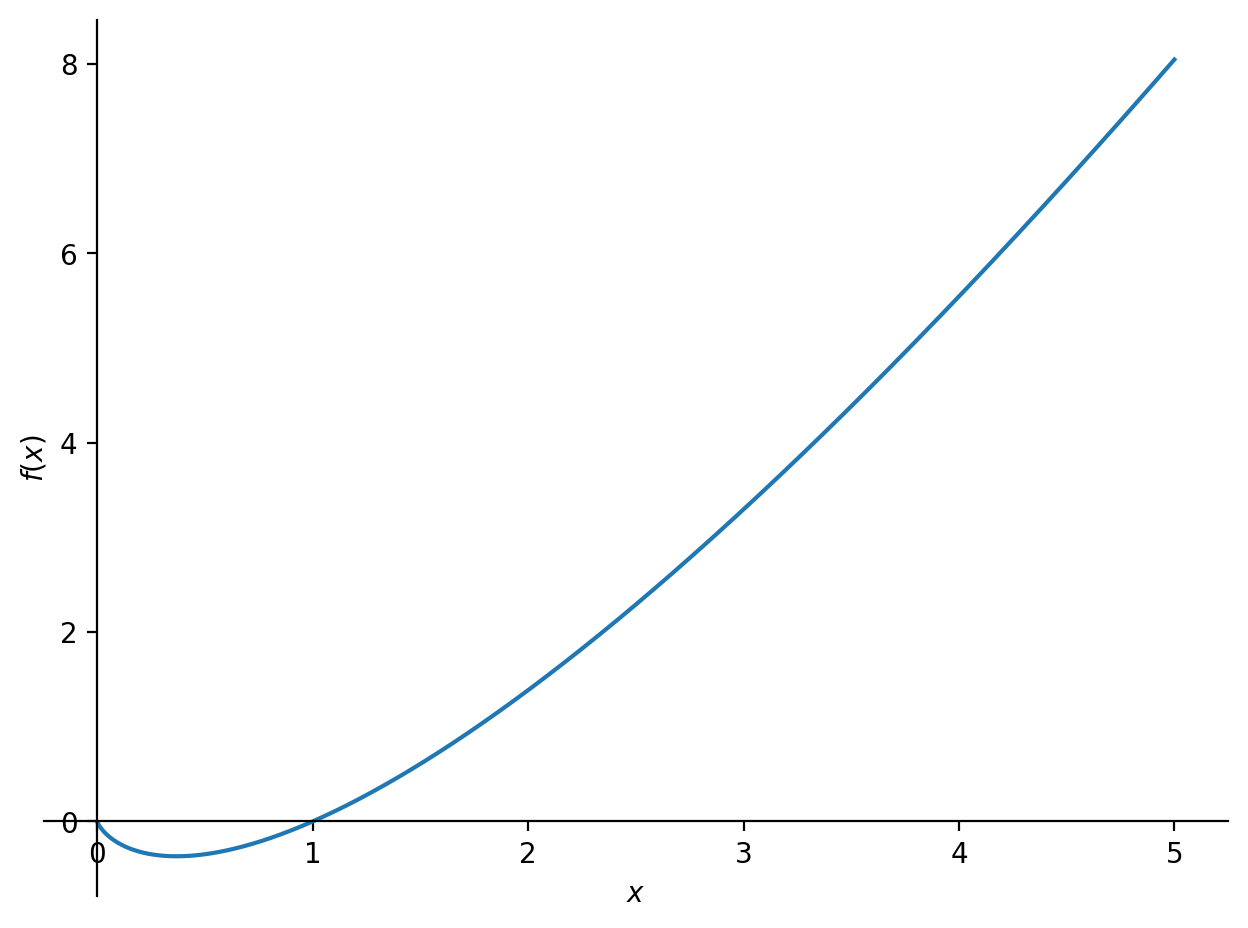

In [103]:
sp.plot(f2_x, (x, -1, 5));

In [104]:
sp.limit(f2_x, x, 0)

In [105]:
f3_x = x ** 2 * sp.exp(-x); f3_x

In [106]:
sp.limit(f3_x, x, sp.oo)

In [107]:
f_add = x ** (sp.S(1) / x); f_add

In [108]:
sp.limit(f_add, x, sp.oo)

## Второй замечательный предел

In [109]:
f4_x = (1 + z / x) ** x; f4_x

In [110]:
sp.limit(f4_x, x, sp.oo)

In [111]:
f5_x = (sp.sin(x + z)- sp.sin(x))/ z; f5_x

In [112]:
sp.limit(f5_x, z, 0)

У функции $limit()$ есть невычисляемый эквивалент – класс $Limit()$, который
возвращает символьный объект типа $sympy.series.limits.Limit$
(невычисленный предел).

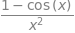

In [113]:
f6_x = (1 - sp.cos(x)) / x ** 2; f6_x

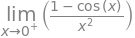

In [114]:
expr = sp.Limit(f6_x, x, 0); expr

Для вычисления символьного объекта, созданного невычисляемым оператором,
нужно использовать метод $doit()$

In [115]:
expr.doit()

In [116]:
## Проверяем
sp.limit(f6_x, x, 0)

### Граф вычислений

Для установки:
```
conda install graphviz python-graphviz
```

In [117]:
# https://docs.sympy.org/latest/tutorials/intro-tutorial/manipulation.html
# https://stackoverflow.com/questions/58503307/tree-form-of-math-formula-as-a-dot-string
# https://stackoverflow.com/questions/33433274/anaconda-graphviz-cant-import-after-installation
# https://graphviz.org/

from sympy import dotprint
from graphviz import Source
from IPython.display import SVG, display  # Для Retina дисплеев - используем SVG (векторная графика)


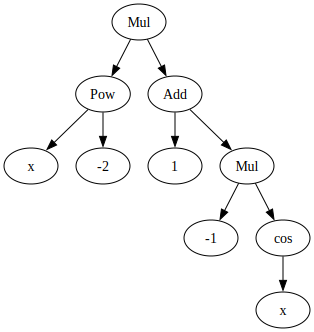

In [118]:
src = Source(dotprint(f6_x))

# Рендеринг для Retina: используем SVG (векторная графика - идеально масштабируется)
display(SVG(src.pipe(format='svg')))

In [119]:
sp.srepr(f6_x)  

"Mul(Pow(Symbol('x'), Integer(-2)), Add(Integer(1), Mul(Integer(-1), cos(Symbol('x')))))"

Для вычисления одностороннего предела следует передать в функцию $limit()$
еще один аргумент '$+$' или '$-$'

In [120]:
f7_x = 1 / x; f7_x

In [121]:
sp.limit(f7_x, x, 0, '+')

In [122]:
sp.limit(f7_x, x, 0, '-')

#### Реализация больших и малых чисел

In [123]:
(sp.S(1) / 1e308).evalf(40)

In [124]:
(sp.S(1) / 1e309).evalf(40)

In [125]:
1 / 1e-309

In [126]:
f_ex = 6 ** (1/x)

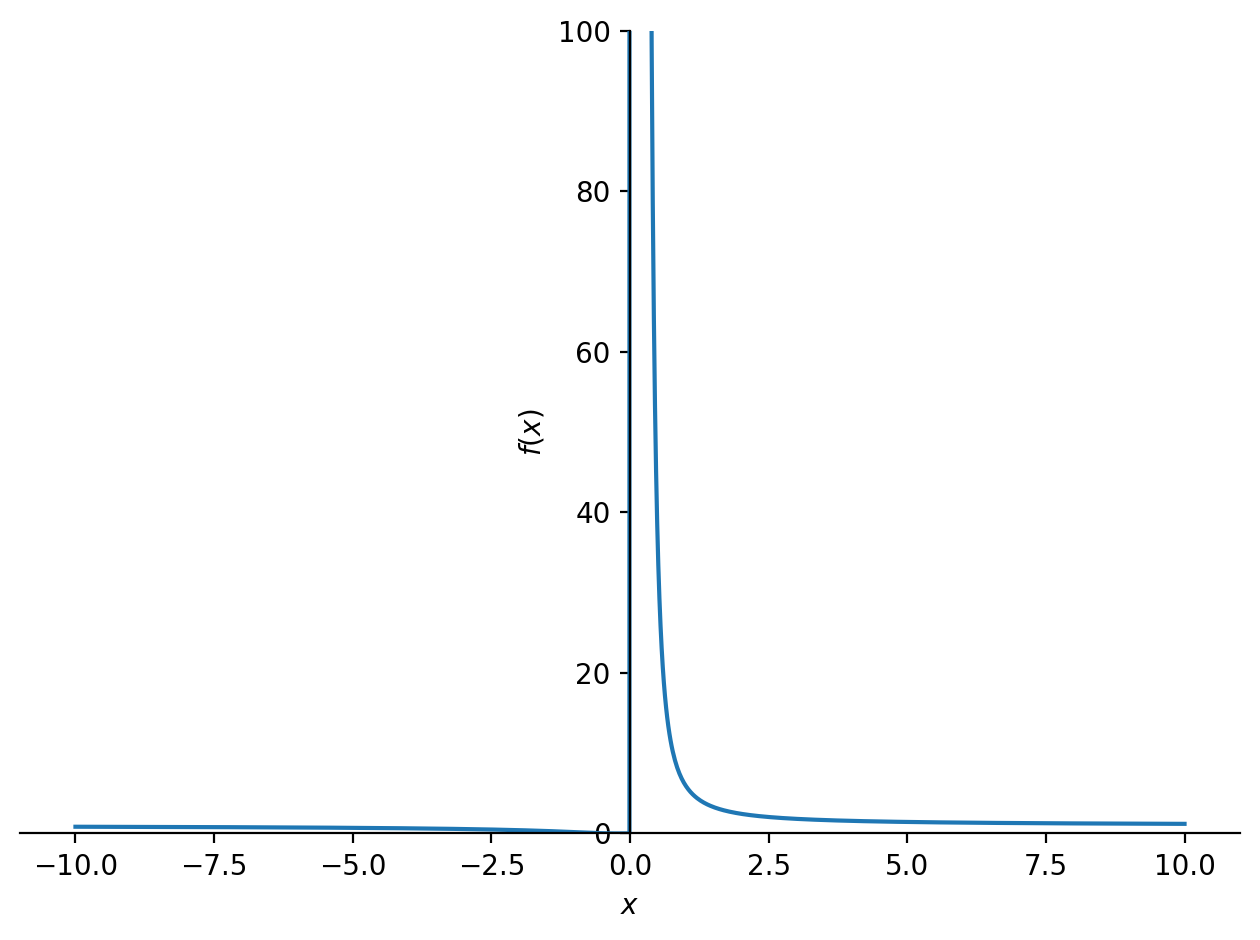

In [127]:
sp.plot(f_ex, (x, -10, 10),ylim=(0, 100));

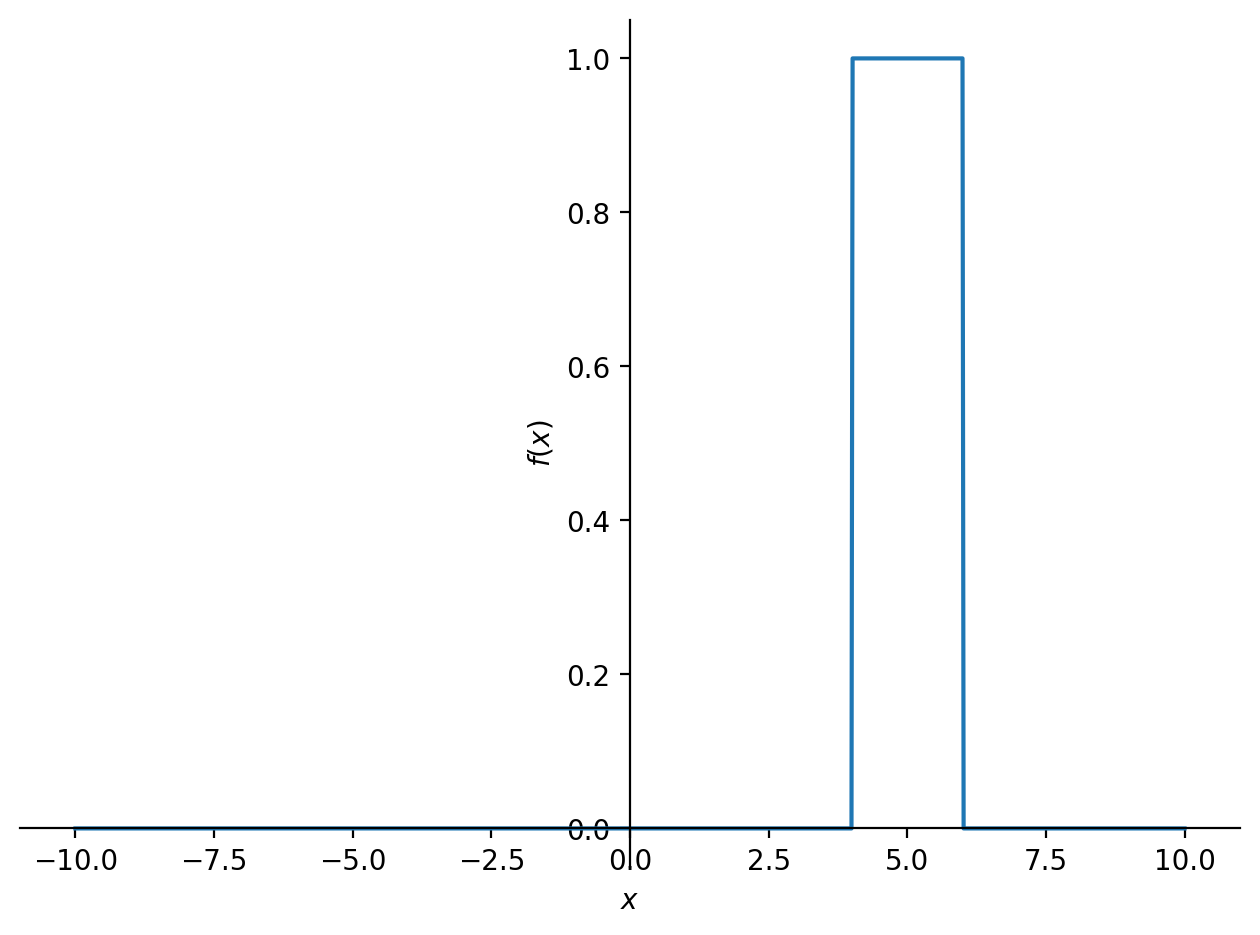

In [128]:
import sympy.plotting as sym_plot
sp.init_printing()
x = sp.symbols('x')
f_2 = sp.Piecewise((0, x <= 4), (0, x >=6), (1, x<6), (1, x>4))
sym_plot.plot(f_2, (x, -10, 10))

In [129]:
f_2

⎧0  for x ≥ 6 ∨ x ≤ 4
⎨                    
⎩1      otherwise    

In [130]:
sp.limit(f_2, x, 4.01)

In [131]:
sp.srepr(f_2)

"Piecewise(ExprCondPair(Integer(0), Or(GreaterThan(Symbol('x'), Integer(6)), LessThan(Symbol('x'), Integer(4)))), ExprCondPair(Integer(1), true))"

## ⚠️ Когда sympy может ошибаться с пределами

**Sympy - отличный инструмент, НО иногда ошибается!**

### 🔴 Категории пределов, требующие проверки:

1. **Экспоненты с переменными:** $a^{f(x)}$ где $f(x) \to \pm\infty$
2. **Односторонние пределы** (особенно с экспонентами)
3. **Неопределённости:** $0^0$, $1^\infty$, $\infty^0$, $\infty - \infty$

### ✅ Как проверять:

**Численно (самый надёжный!):**
```python
for x_val in [-0.1, -0.01, -0.001]:
    print(f"x={x_val}: f(x)={...}")
```

**График:**
```python
plt.plot(x, f(x))  # Посмотреть визуально
```

**Логически:**
"При $x \to 0^-$: $1/x \to -\infty$, значит $6^{1/x} = 6^{-\infty} \to 0$"

### ✅ Когда sympy надёжен:

- Полиномы и рациональные функции
- Стандартные тригонометрические пределы  
- Пределы "из учебника"

**Правило:** Экзотика (экспоненты, односторонние) → проверяй!

---

### Пример с багом ниже ↓


In [132]:
y1 = 6 ** (1/x)
y1

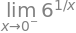

In [133]:
sp.Limit(y1, x, 0, '-')

In [134]:
# ⚠️ БАГ В SYMPY: неправильный результат для этого предела!

print("⚠️ sympy.Limit().doit() выдаёт НЕВЕРНЫЙ результат:")
result = sp.Limit(y1, x, 0, '-').doit()
print(f"   {result}  ← НЕПРАВИЛЬНО!")
print()
print("✓ ПРАВИЛЬНЫЙ ответ: 0")
print()
print("Почему 0?")
print("  • При x → 0⁻ имеем: 1/x → -∞")
print("  • Значит: 6^(1/x) = 6^(-∞)")
print("  • А 6^(-∞) = 1/(6^∞) = 1/∞ = 0")
print()
print("Проверим численно в следующей ячейке ↓")

⚠️ sympy.Limit().doit() выдаёт НЕВЕРНЫЙ результат:
   oo  ← НЕПРАВИЛЬНО!

✓ ПРАВИЛЬНЫЙ ответ: 0

Почему 0?
  • При x → 0⁻ имеем: 1/x → -∞
  • Значит: 6^(1/x) = 6^(-∞)
  • А 6^(-∞) = 1/(6^∞) = 1/∞ = 0

Проверим численно в следующей ячейке ↓


In [135]:
# ✓ ПРАВИЛЬНОЕ вычисление - ЧИСЛЕННАЯ проверка:
print("Проверим численно:")
print("=" * 60)

import numpy as np

# Приближаемся к 0 слева (отрицательные x)
x_values = [-0.1, -0.01, -0.001, -0.0001, -0.00001]

for x_val in x_values:
    y_val = 6**(1/x_val)
    print(f"x = {x_val:9.5f}:  1/x = {1/x_val:10.1f},  6^(1/x) = {y_val:.10f}")

print("=" * 60)
print()
print("Видно, что 6^(1/x) → 0 при x → 0⁻")
print()
print("✓ ПРАВИЛЬНЫЙ ОТВЕТ: 0")
print()
print("Объяснение:")
print("  При x → 0⁻: имеем 1/x → -∞")
print("  Значит 6^(1/x) = 6^(-∞) = 1/(6^∞) → 0")


Проверим численно:
x =  -0.10000:  1/x =      -10.0,  6^(1/x) = 0.0000000165
x =  -0.01000:  1/x =     -100.0,  6^(1/x) = 0.0000000000
x =  -0.00100:  1/x =    -1000.0,  6^(1/x) = 0.0000000000
x =  -0.00010:  1/x =   -10000.0,  6^(1/x) = 0.0000000000
x =  -0.00001:  1/x =  -100000.0,  6^(1/x) = 0.0000000000

Видно, что 6^(1/x) → 0 при x → 0⁻

✓ ПРАВИЛЬНЫЙ ОТВЕТ: 0

Объяснение:
  При x → 0⁻: имеем 1/x → -∞
  Значит 6^(1/x) = 6^(-∞) = 1/(6^∞) → 0


In [136]:
# 💡 Функция для быстрой проверки результата sympy

def quick_check(f, x_sym, a, direction='+-'):
    """
    Численная проверка предела (когда не доверяем sympy!)
    
    f - функция (sympy выражение)
    x_sym - символ переменной  
    a - точка предела
    direction - '+' справа, '-' слева, '+-' с обеих сторон
    """
    import numpy as np
    
    # Конвертируем sympy → numpy функцию
    f_np = sp.lambdify(x_sym, f, 'numpy')
    
    if '-' in direction:
        print("Приближение слева:")
        for eps in [0.1, 0.01, 0.001, 0.0001]:
            x_val = a - eps
            try:
                result = f_np(x_val)
                print(f"  x = {x_val:8.4f}: f(x) = {result:.10f}")
            except:
                print(f"  x = {x_val:8.4f}: ошибка вычисления")
        print()
    
    if '+' in direction:
        print("Приближение справа:")
        for eps in [0.1, 0.01, 0.001, 0.0001]:
            x_val = a + eps
            try:
                result = f_np(x_val)
                print(f"  x = {x_val:8.4f}: f(x) = {result:.10f}")
            except:
                print(f"  x = {x_val:8.4f}: ошибка вычисления")
        print()

# Пример использования:
print("Проверим 6^(1/x) при x→0⁻:")
quick_check(6**(1/x), x, 0, '-')


Проверим 6^(1/x) при x→0⁻:
Приближение слева:
  x =  -0.1000: f(x) = 0.0000000165
  x =  -0.0100: f(x) = 0.0000000000
  x =  -0.0010: f(x) = 0.0000000000
  x =  -0.0001: f(x) = 0.0000000000



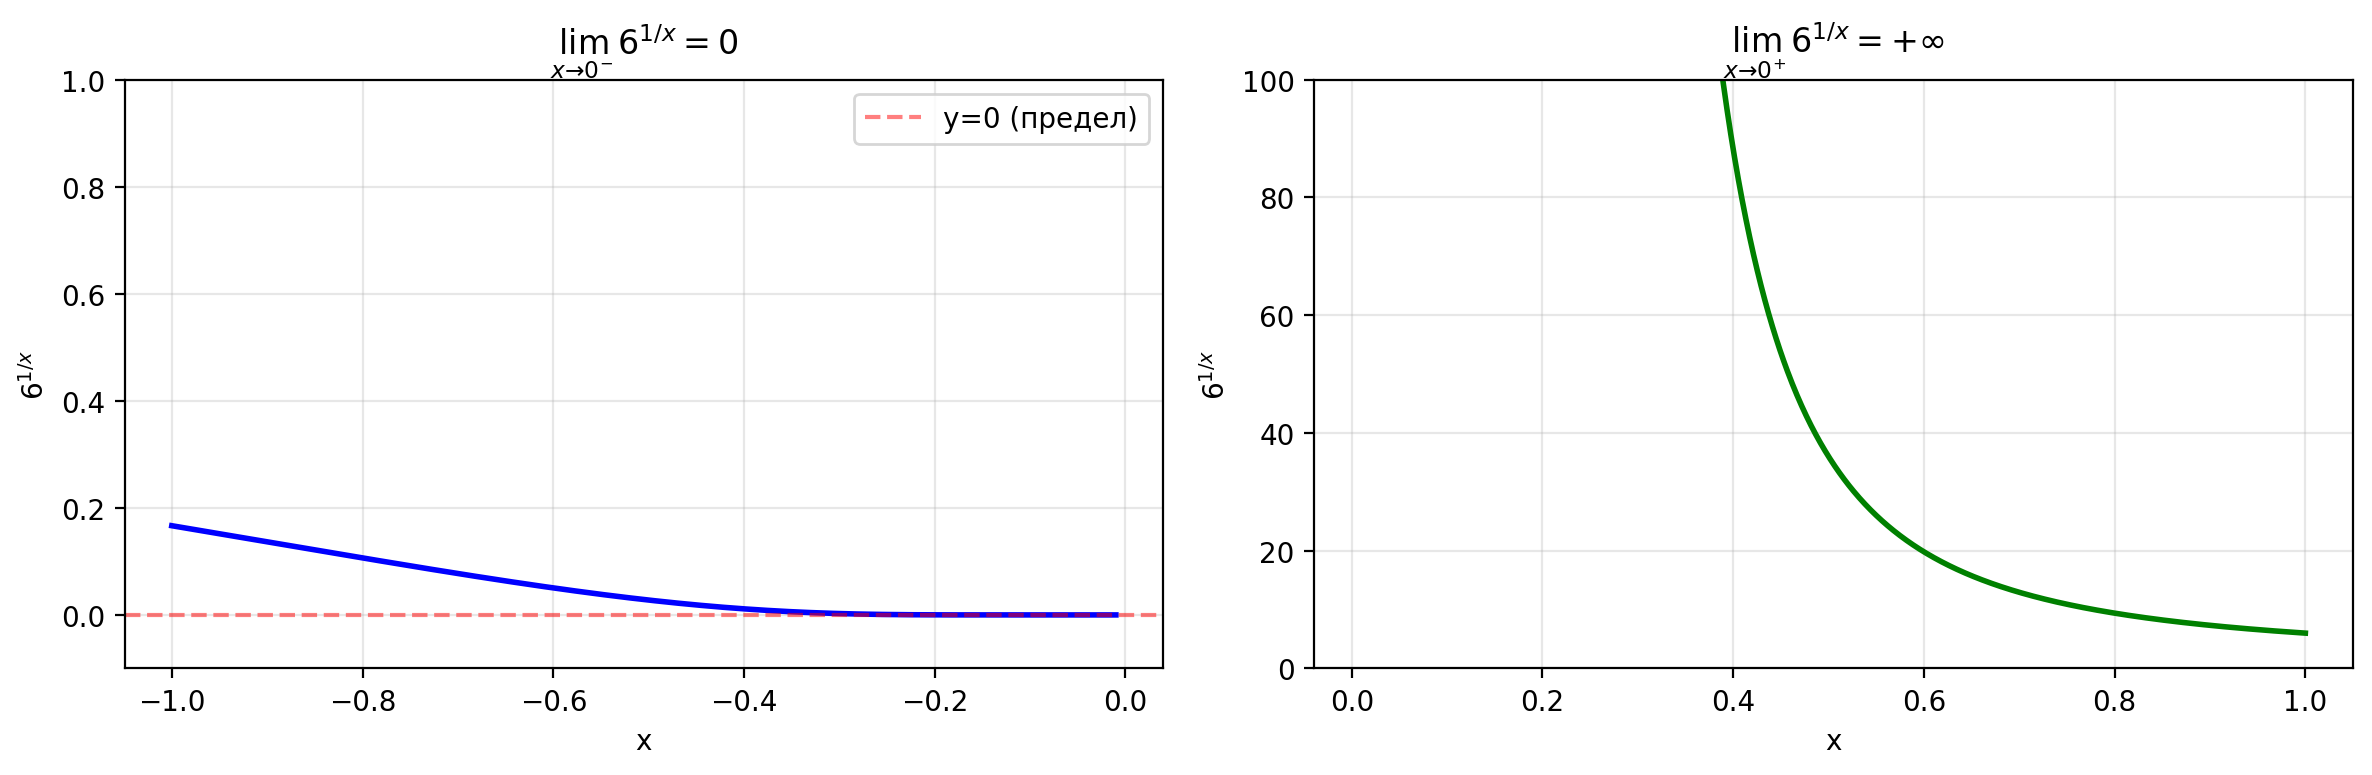

При x→0⁻: 1/x → -∞, поэтому 6^(1/x) = 6^(-∞) → 0
При x→0⁺: 1/x → +∞, поэтому 6^(1/x) = 6^(+∞) → +∞


In [137]:
# Визуализация для подтверждения
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# График слева от 0
x_left = np.linspace(-1, -0.01, 1000)
y_left = 6**(1/x_left)

ax1.plot(x_left, y_left, 'b-', linewidth=2)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='y=0 (предел)')
ax1.set_xlabel('x')
ax1.set_ylabel('$6^{1/x}$')
ax1.set_title('$\\lim_{x \\to 0^-} 6^{1/x} = 0$')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_ylim(-0.1, 1)

# График справа от 0 (для сравнения)
x_right = np.linspace(0.01, 1, 1000)
y_right = 6**(1/x_right)

ax2.plot(x_right, y_right, 'g-', linewidth=2)
ax2.set_xlabel('x')
ax2.set_ylabel('$6^{1/x}$')
ax2.set_title('$\\lim_{x \\to 0^+} 6^{1/x} = +\\infty$')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 100)

plt.tight_layout()
plt.show()

print("При x→0⁻: 1/x → -∞, поэтому 6^(1/x) = 6^(-∞) → 0")
print("При x→0⁺: 1/x → +∞, поэтому 6^(1/x) = 6^(+∞) → +∞")


In [138]:
sp.limit(y1, x, 0, '+')

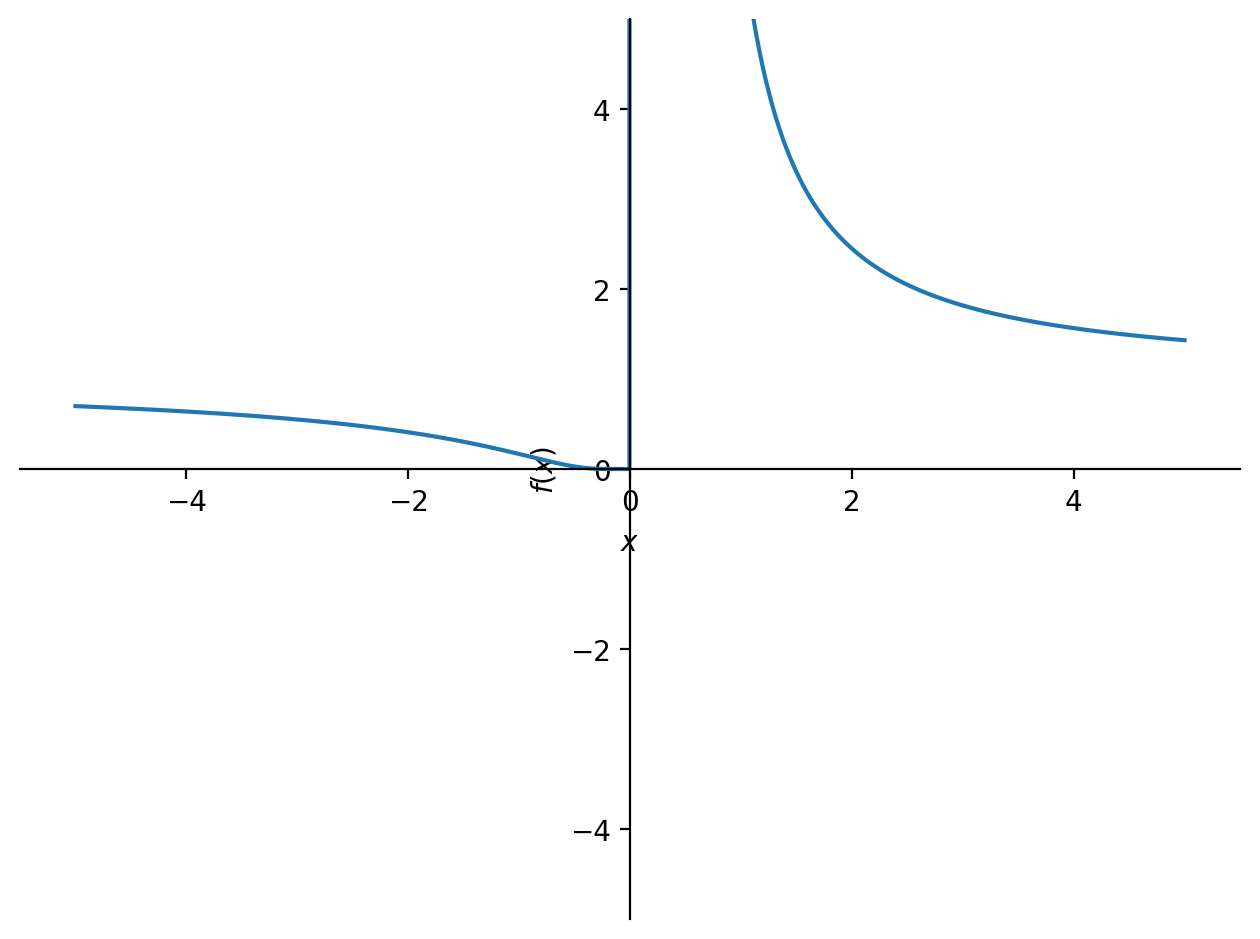

In [139]:
sp.plot(y1, (x, -5, 5), ylim=(-5, 5));

In [140]:
y2 = sp.Piecewise((x ** 2 , x <= 1), (2 * x + 1, x >1))
y2

⎧   2              
⎪  x      for x ≤ 1
⎨                  
⎪2⋅x + 1  otherwise
⎩                  

In [141]:
sp.limit(y2, x, 1, '-')

In [142]:
sp.limit(y2, x, 1.00000000000001, '+')

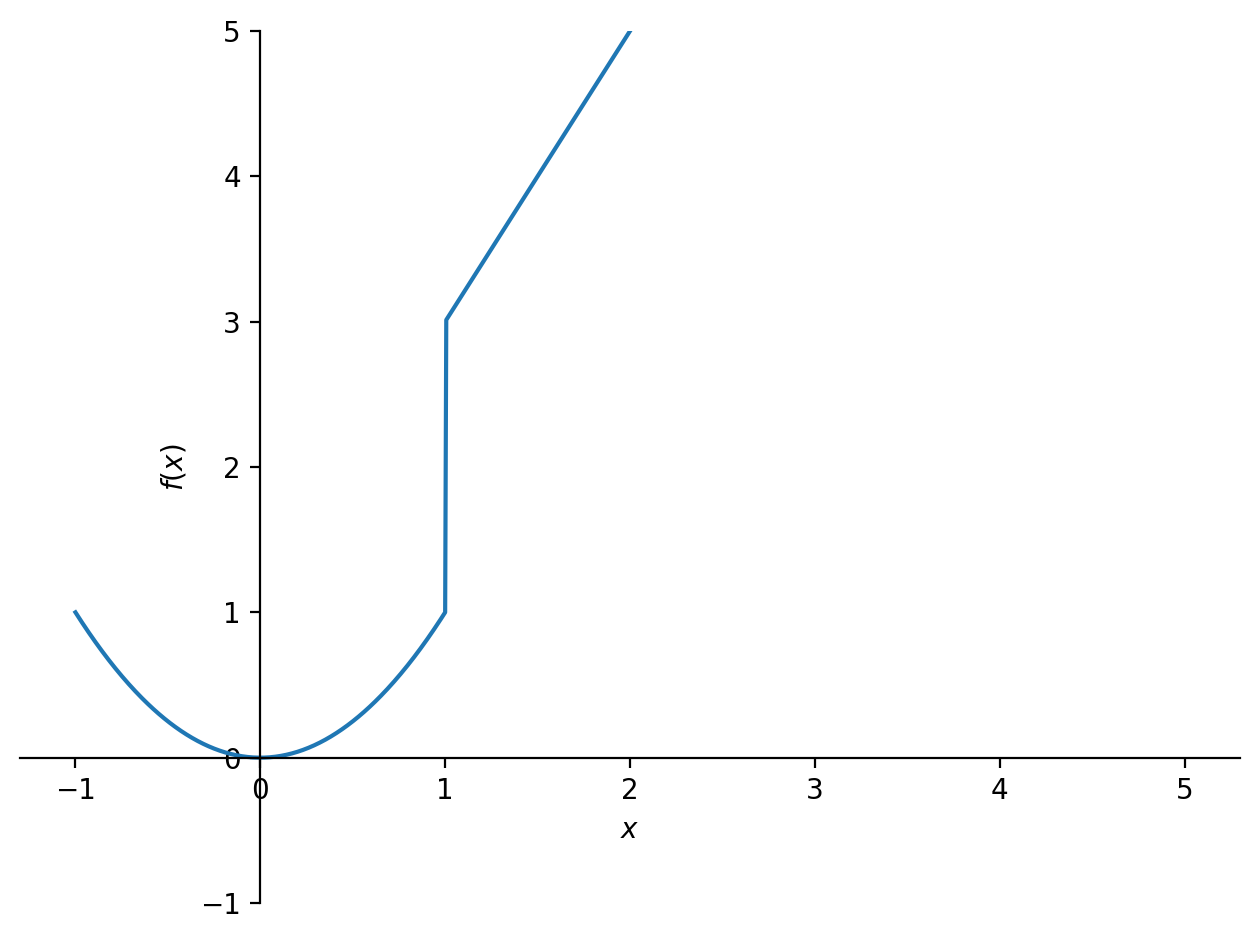

In [143]:
sp.plot(y2, (x, -1, 5), ylim=(-1, 5));

---

### Дифференцирование

Для символьного дифференцирования предназначена
функция __diff(...)__. Первым аргументом она принимает символьное
выражение, которое будет дифференцироваться, а вторым – переменную, по
которой вычисляется производная

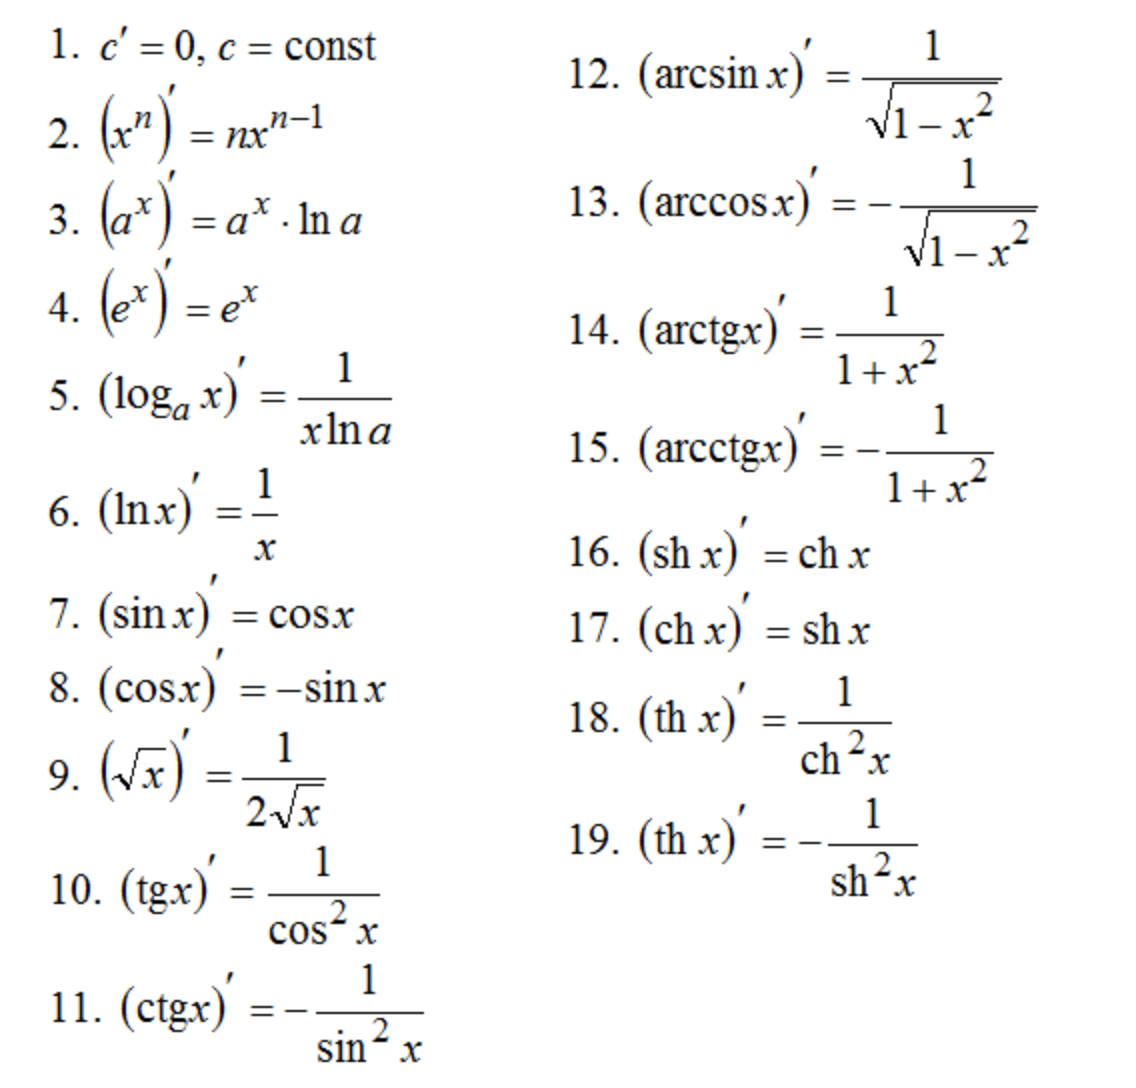

Пошаговое выполнение  
https://www.sympygamma.com/

#### Важно!
Производная от $ e^x$ - это  $e^x $

In [144]:
sp.exp(x).diff(x)

In [145]:
# Задание из презенатации
fx = (x ** 2 * sp.sin(1/x)) 
gx = sp.sin(x)

In [146]:
fx

In [147]:
gx

In [148]:
sp.limit(fx/gx, x, 0)

In [149]:
fx

In [150]:
fx_diff = sp.diff(fx, x); fx_diff

In [151]:
gx

In [152]:
gx_diff = sp.diff(gx,x); gx_diff

In [153]:
sp.limit(fx_diff, x, 0)

In [154]:
sp.limit(gx_diff, x, 0)

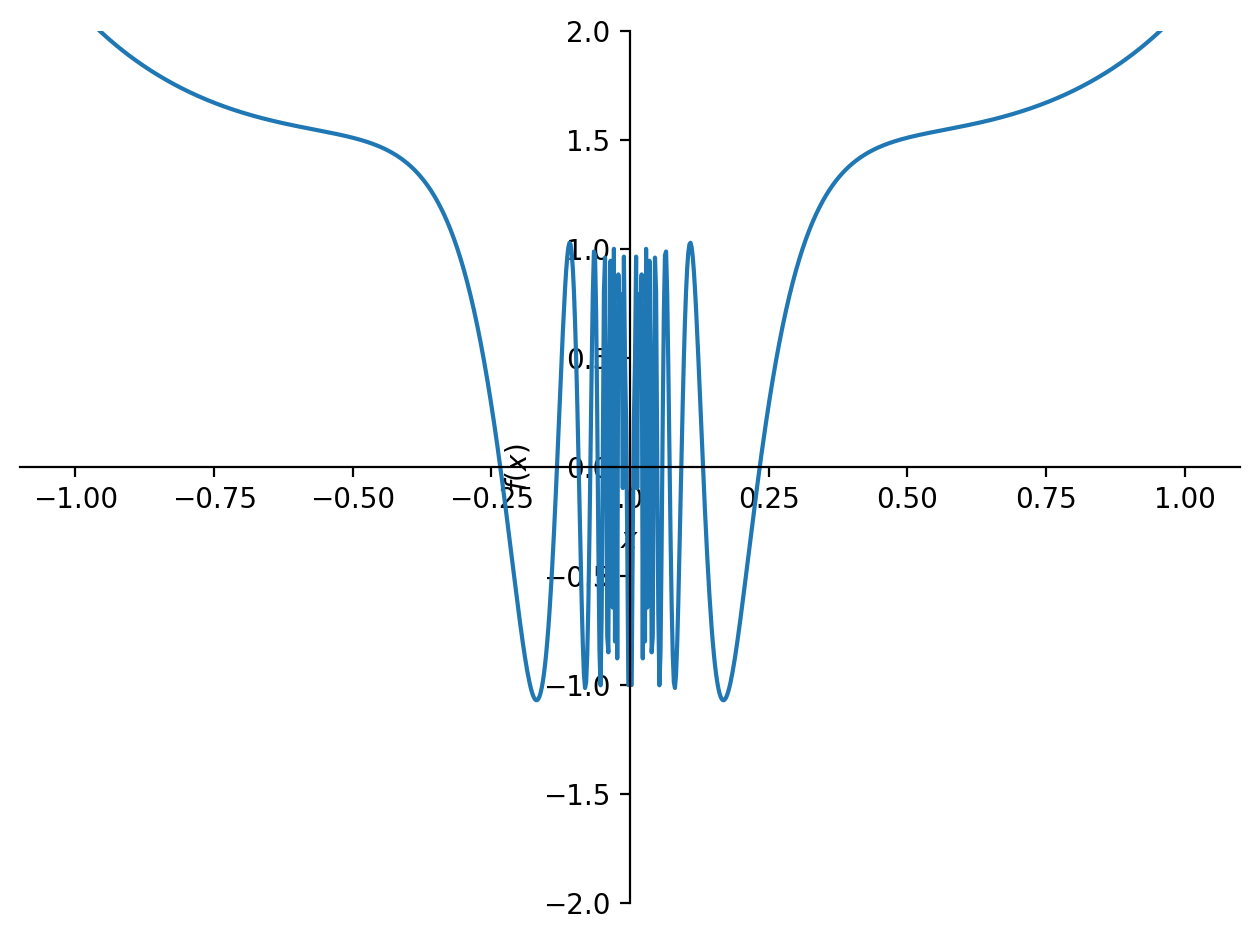

In [155]:
sp.plot(fx_diff/gx_diff, (x, -1, 1), ylim=(-2, 2))

In [156]:
res = sp.limit(fx_diff/gx_diff, x, 0); res

In [157]:
func = sp.sin(x) * sp.exp(x); func

In [158]:
sp.diff(func, x)

## Задача № 1
#### Найти производную функции f(x) в точке x=5
$ f(x) = x^3 + 3x^2 -72x + 90$

$ f'(x) = (x^3 + 3x^2 -72x + 90$)'

#### Производная
$ f'(x) = 3x^2 + 6x - 72 $  
$ f'(5) = 3*5^2+ 6*5-72 = 33$

In [159]:
sp.var('x')
func = x ** 3 + 3 * x ** 2 - 72*x + 90
# Находим производную
dfunc = sp.diff(func, x)
dfunc

In [160]:
# Вычисляем значение производной в точке x=5
dfunc.subs({x:5})

Функцию $diff()$ можно использовать для вычисления производных
второго и более высокого порядков.

In [161]:
sp.diff(x ** 4, x, x) # два раза дифференцируем по x

In [162]:
sp.diff(x ** 4, x, 3) # третья производная по x

Можно дифференцировать выражение по нескольким переменным, т.е.
вычислять смешанные частные производные.

In [163]:
F_xy = sp.exp(x * y ** 2); F_xy

Результат: <font size="5">$\frac{d^2f}{dxdy}$</font>

In [164]:
sp.diff(F_xy, x, y)

Результат: <font size="5">$\frac{d^5f}{dx^3dy^2}$</font>

In [165]:
sp.diff(F_xy, x, 3, y, 2)

В следующем примере мы вычисляем градиент функции 3–х переменных.

In [166]:
x, y, z = sp.symbols('x y z')
f = x ** 2 + y ** 2 + z ** 2; f

In [167]:
g = [sp.diff(f, var) for var in [x, y, z]]; g

У символьных выражений есть также метод $diff()$

In [168]:
F_xy.diff(x, 2, y)

У $diff()$ есть невычисляемый эквивалент – класс $Derivative()$. Он
возвращает выражение типа $sympy.core.function.Derivative$.

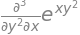

In [169]:
f1 = sp.Derivative(F_xy, x, y, y); f1

Чтобы вычислить выражение, созданное невычисляемым оператором, нужно
использовать метод $doit()$

In [170]:
f1.doit()

Иногда полезно иметь символьные формулы, содержащие произвольные
функции. Чтобы сказать системе, что переменная является именем символьной
функции можно использовать инструкцию

In [171]:
f = sp.Function('f')

После этого идентификатор f становится именем функции и с ним можно
выполнять операции, определенные для функций.

In [172]:
f(x).diff(x)

Другой способ создать символьные функции состоит в использовании функции
$symbols()$ с опцией $cls=Functions$.


In [173]:
f, g, h = sp.symbols('f g h', cls=sp.Function)

Получим некоторые классические формулы дифференцирования.

### Правило суммы

In [194]:
(f(x) + g(x)).diff(x)

In [195]:
### Пример 1
f1 = sp.sin(x)
g1 = x ** 2
(f1 + g1).diff(x)

### Производная от произведения
Основное правило -> 'Левая * d(Правая) + Правая * d(Левая)'  
$ (f\cdot g)'={f\cdot g'}+{g\cdot f'} $

In [196]:
(f(x) * g(x)).diff(x)

In [177]:
### Пример 2
f1 = sp.sin(x)
g1 = x ** 2
(f1 * g1).diff(x)

### Композиция функций

In [197]:
f(g(x)).diff(x)

In [179]:
### Пример 3
g1 = x ** 2
f1 = sp.sin(x)

In [198]:
# Вместо x подставляем функцию g1
f1.subs({'x':g1}).diff(x)

## Примеры

In [181]:
(f(x) * g(x) * h(x)).diff(x)

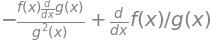

In [182]:
sp.diff(f(x) / g(x), x)

Вот как можно продифференцировать сложную функцию.

In [183]:
sp.diff(sp.exp(f(x)),x)

Символьная функция может иметь несколько аргументов

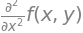

In [184]:
f(x,y).diff(x, 2)

In [185]:
f(x,y).diff(x, y)

**Пример**. Найдем максимум функции $f(x)=x^3-2x+x$

Вначале определим экстремальные точки функции, приравняв нулю ее
производные. Затем вычислим значения вторых производных в экстремальных
точках.

In [199]:
func = x ** 3 - 2 * x ** 2 + x; func

In [200]:
diff1 = sp.diff(func, x);diff1

In [201]:
# Найти корни уравнения
sols = sp.solve(diff1, x); sols

In [202]:
sp.diff(diff1, x).subs({x:sols[0]})

In [203]:
sp.diff(diff1,x).subs({x:sols[1]})

В точке $\frac{1}{3}$ вторая производная отрицательна, а это означает, что это точка
максимума. Значит, локальный максимум равен:

In [204]:
func.subs({x:sols[0]})

In [205]:
from sympy.plotting import plot

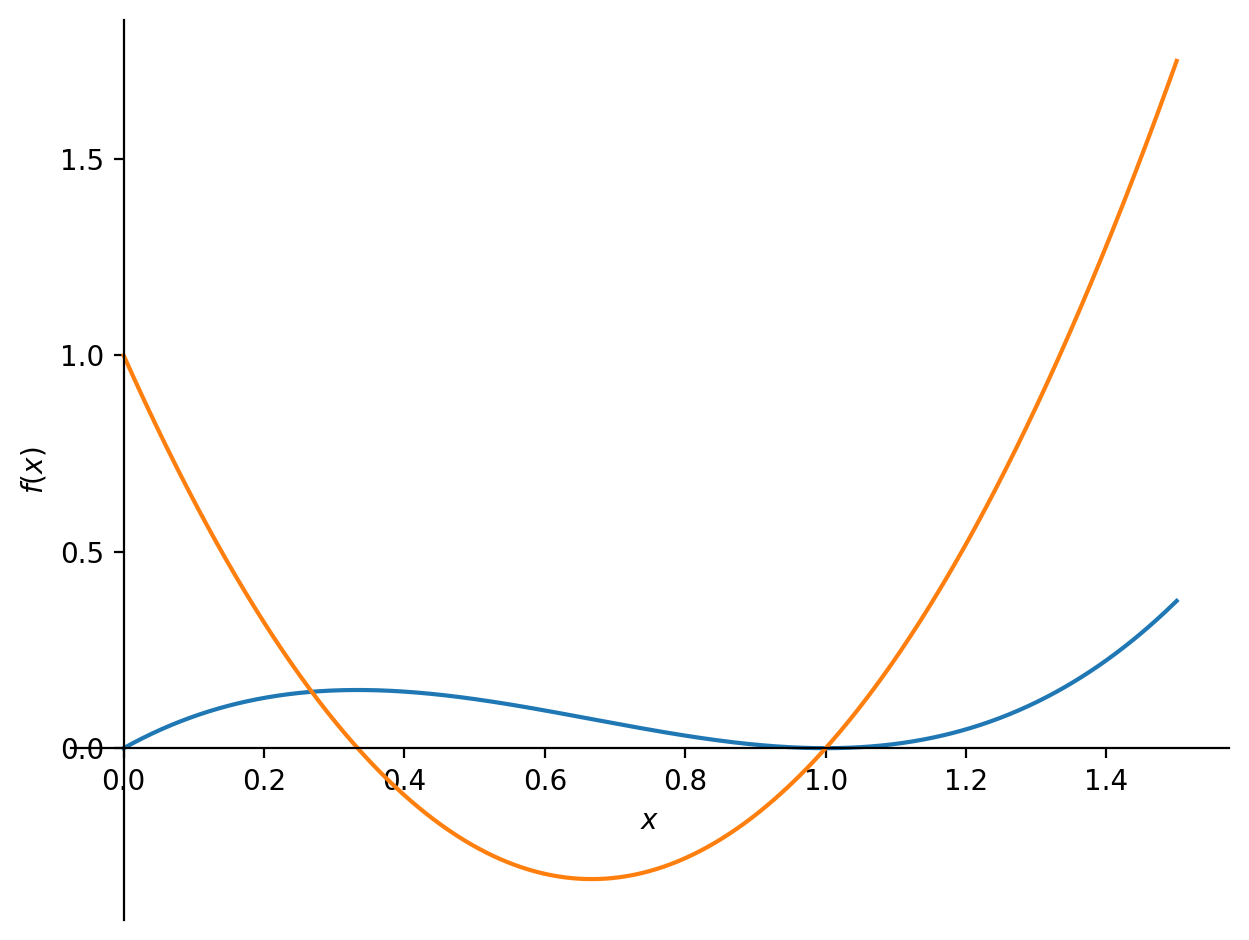

In [206]:
plot(func, diff1, (x, 0, 1.5));